# Importing libraries

In [77]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
df=pd.read_csv(r'C:\Users\91882\Downloads\archive (6)\heart.csv')

In [79]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [80]:
df.shape

(1025, 14)

# Taking care of missing values

In [81]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Getting information from data

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Cheking for duplicate values

In [83]:
df.duplicated().any()

True

true indicates there is duplicate values

# Removing the duplicate values

In [84]:
df=df.drop_duplicates()

In [85]:
df.duplicated().any()

False

now all duplicate values are removed

In [86]:
df.shape

(302, 14)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


# EDA

# 1.Univariate Analysis

In [88]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# 1] checking for target column i.e biased or unbiased

<AxesSubplot:xlabel='target', ylabel='count'>

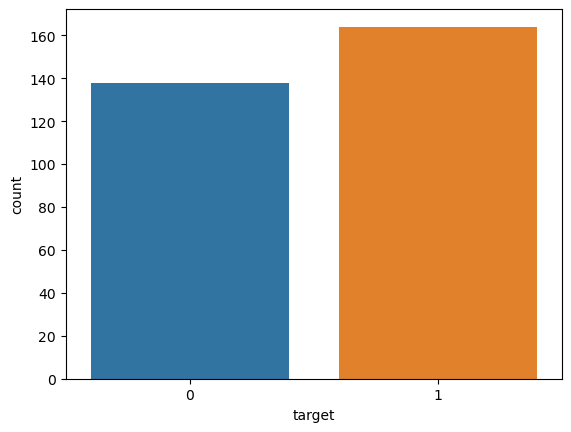

In [89]:
sns.countplot(x=df['target'])

The data is unbiased so, it is fit for model training

# 2] Age

<AxesSubplot:ylabel='age'>

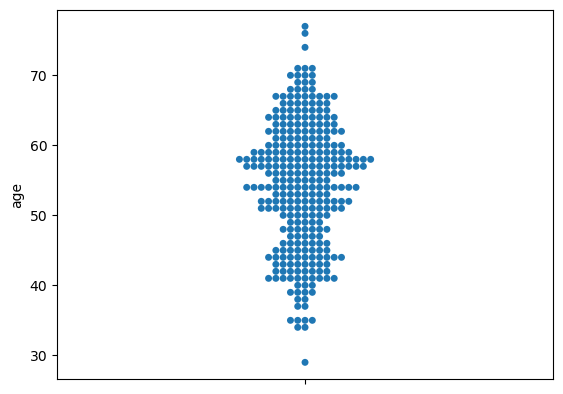

In [90]:
sns.swarmplot(y=df['age'])

Most age groups are between 35 to 70

# 3] Chest pain type

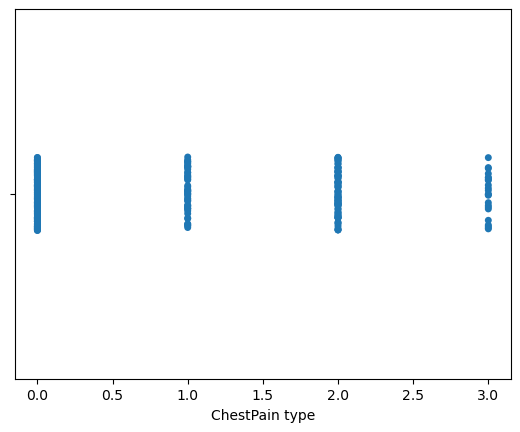

In [91]:
sns.stripplot(x=df['cp'])
plt.xlabel('ChestPain type')
plt.show()

Almost 4 types of cp is occured equally for the people

# 4]Serum cholestrol

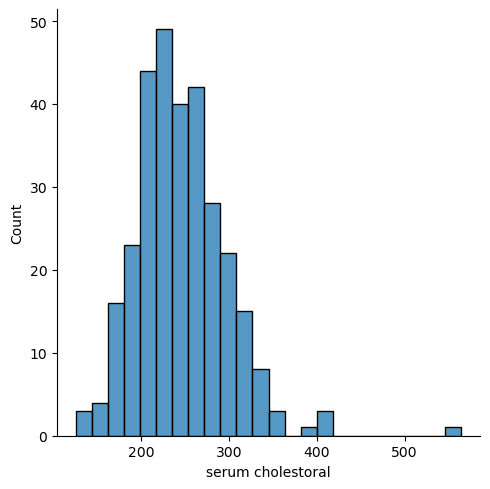

In [92]:
sns.displot(x=df['chol'])
plt.xlabel('serum cholestoral')
plt.show()

# 5]Number of major vessels

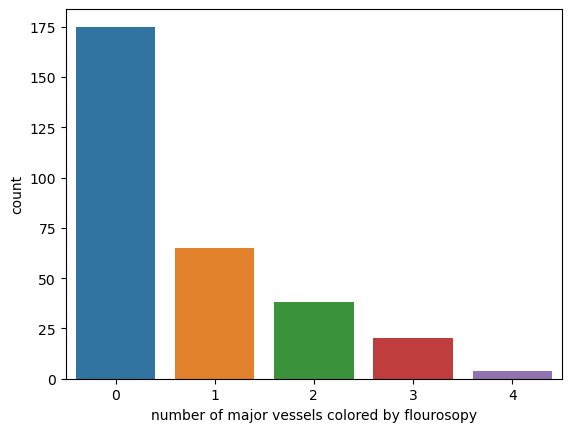

In [93]:
sns.countplot(x=df['ca'])
plt.xlabel('number of major vessels colored by flourosopy')
plt.show()

# 3]cp with target

<AxesSubplot:xlabel='cp', ylabel='count'>

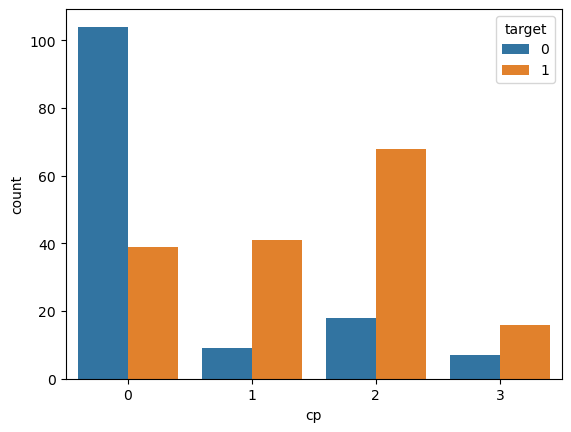

In [94]:
sns.countplot(x=df['cp'],hue=df['target'])

2 nd type of chest pain causes the heart attack in most of people

# 2.Bivariate analysis

# 1]Target vs age

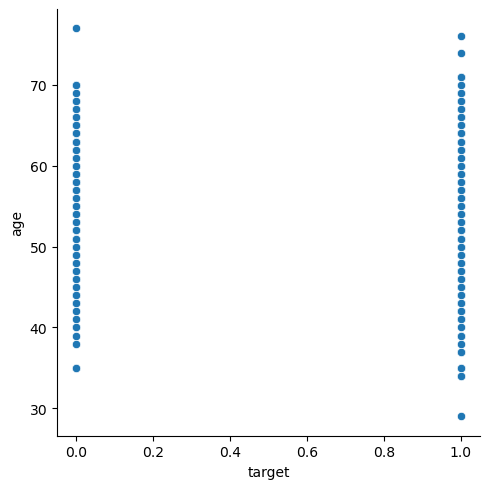

In [95]:
sns.relplot(x=df['target'],y=df['age'])
plt.show()

In [96]:
print(max(df['age']))
print(min(df['age']))

77
29


# 2]Sex vs target

<AxesSubplot:xlabel='sex', ylabel='target'>

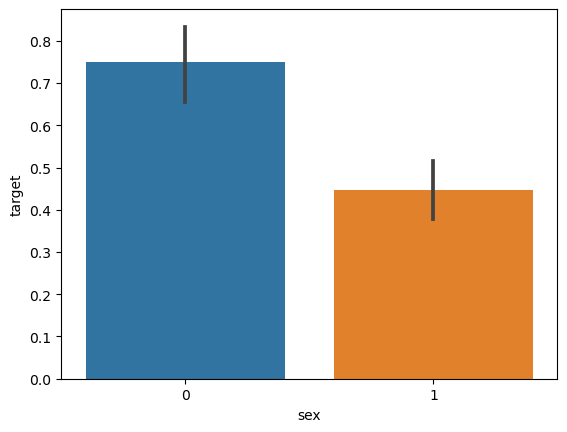

In [97]:
sns.barplot(x=df['sex'],y=df['target'])

In [98]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

# 4]thalach vs target

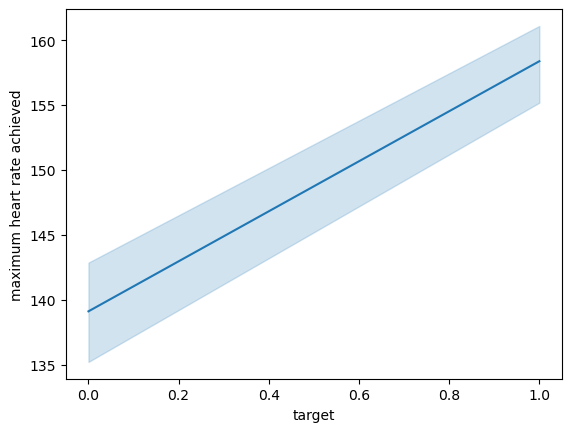

In [99]:
sns.lineplot(x=df['target'],y=df['thalach'])
plt.ylabel('maximum heart rate achieved')
plt.show()

Heart rate is directly proportional to target

# 5]Old peak vs target

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

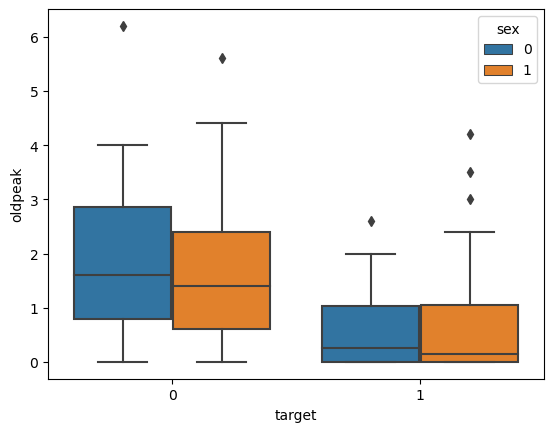

In [100]:
sns.boxplot(x=df['target'],y=df['oldpeak'],hue=df['sex'])

# 6]Thal vs sex with target

<AxesSubplot:xlabel='thal', ylabel='sex'>

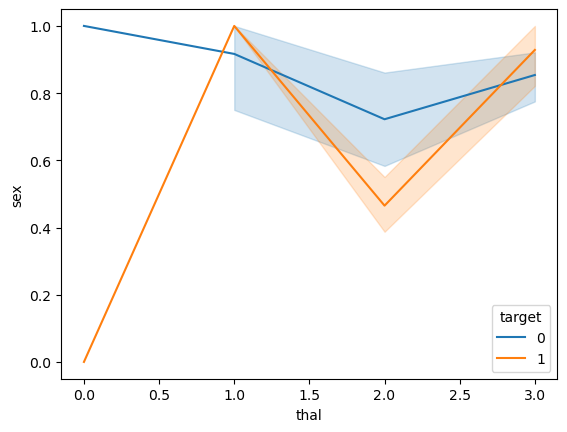

In [101]:
sns.lineplot(x=df['thal'],y=df['sex'],hue=df['target'])

# Entire dataset with respect to target

<Figure size 25000x25000 with 0 Axes>

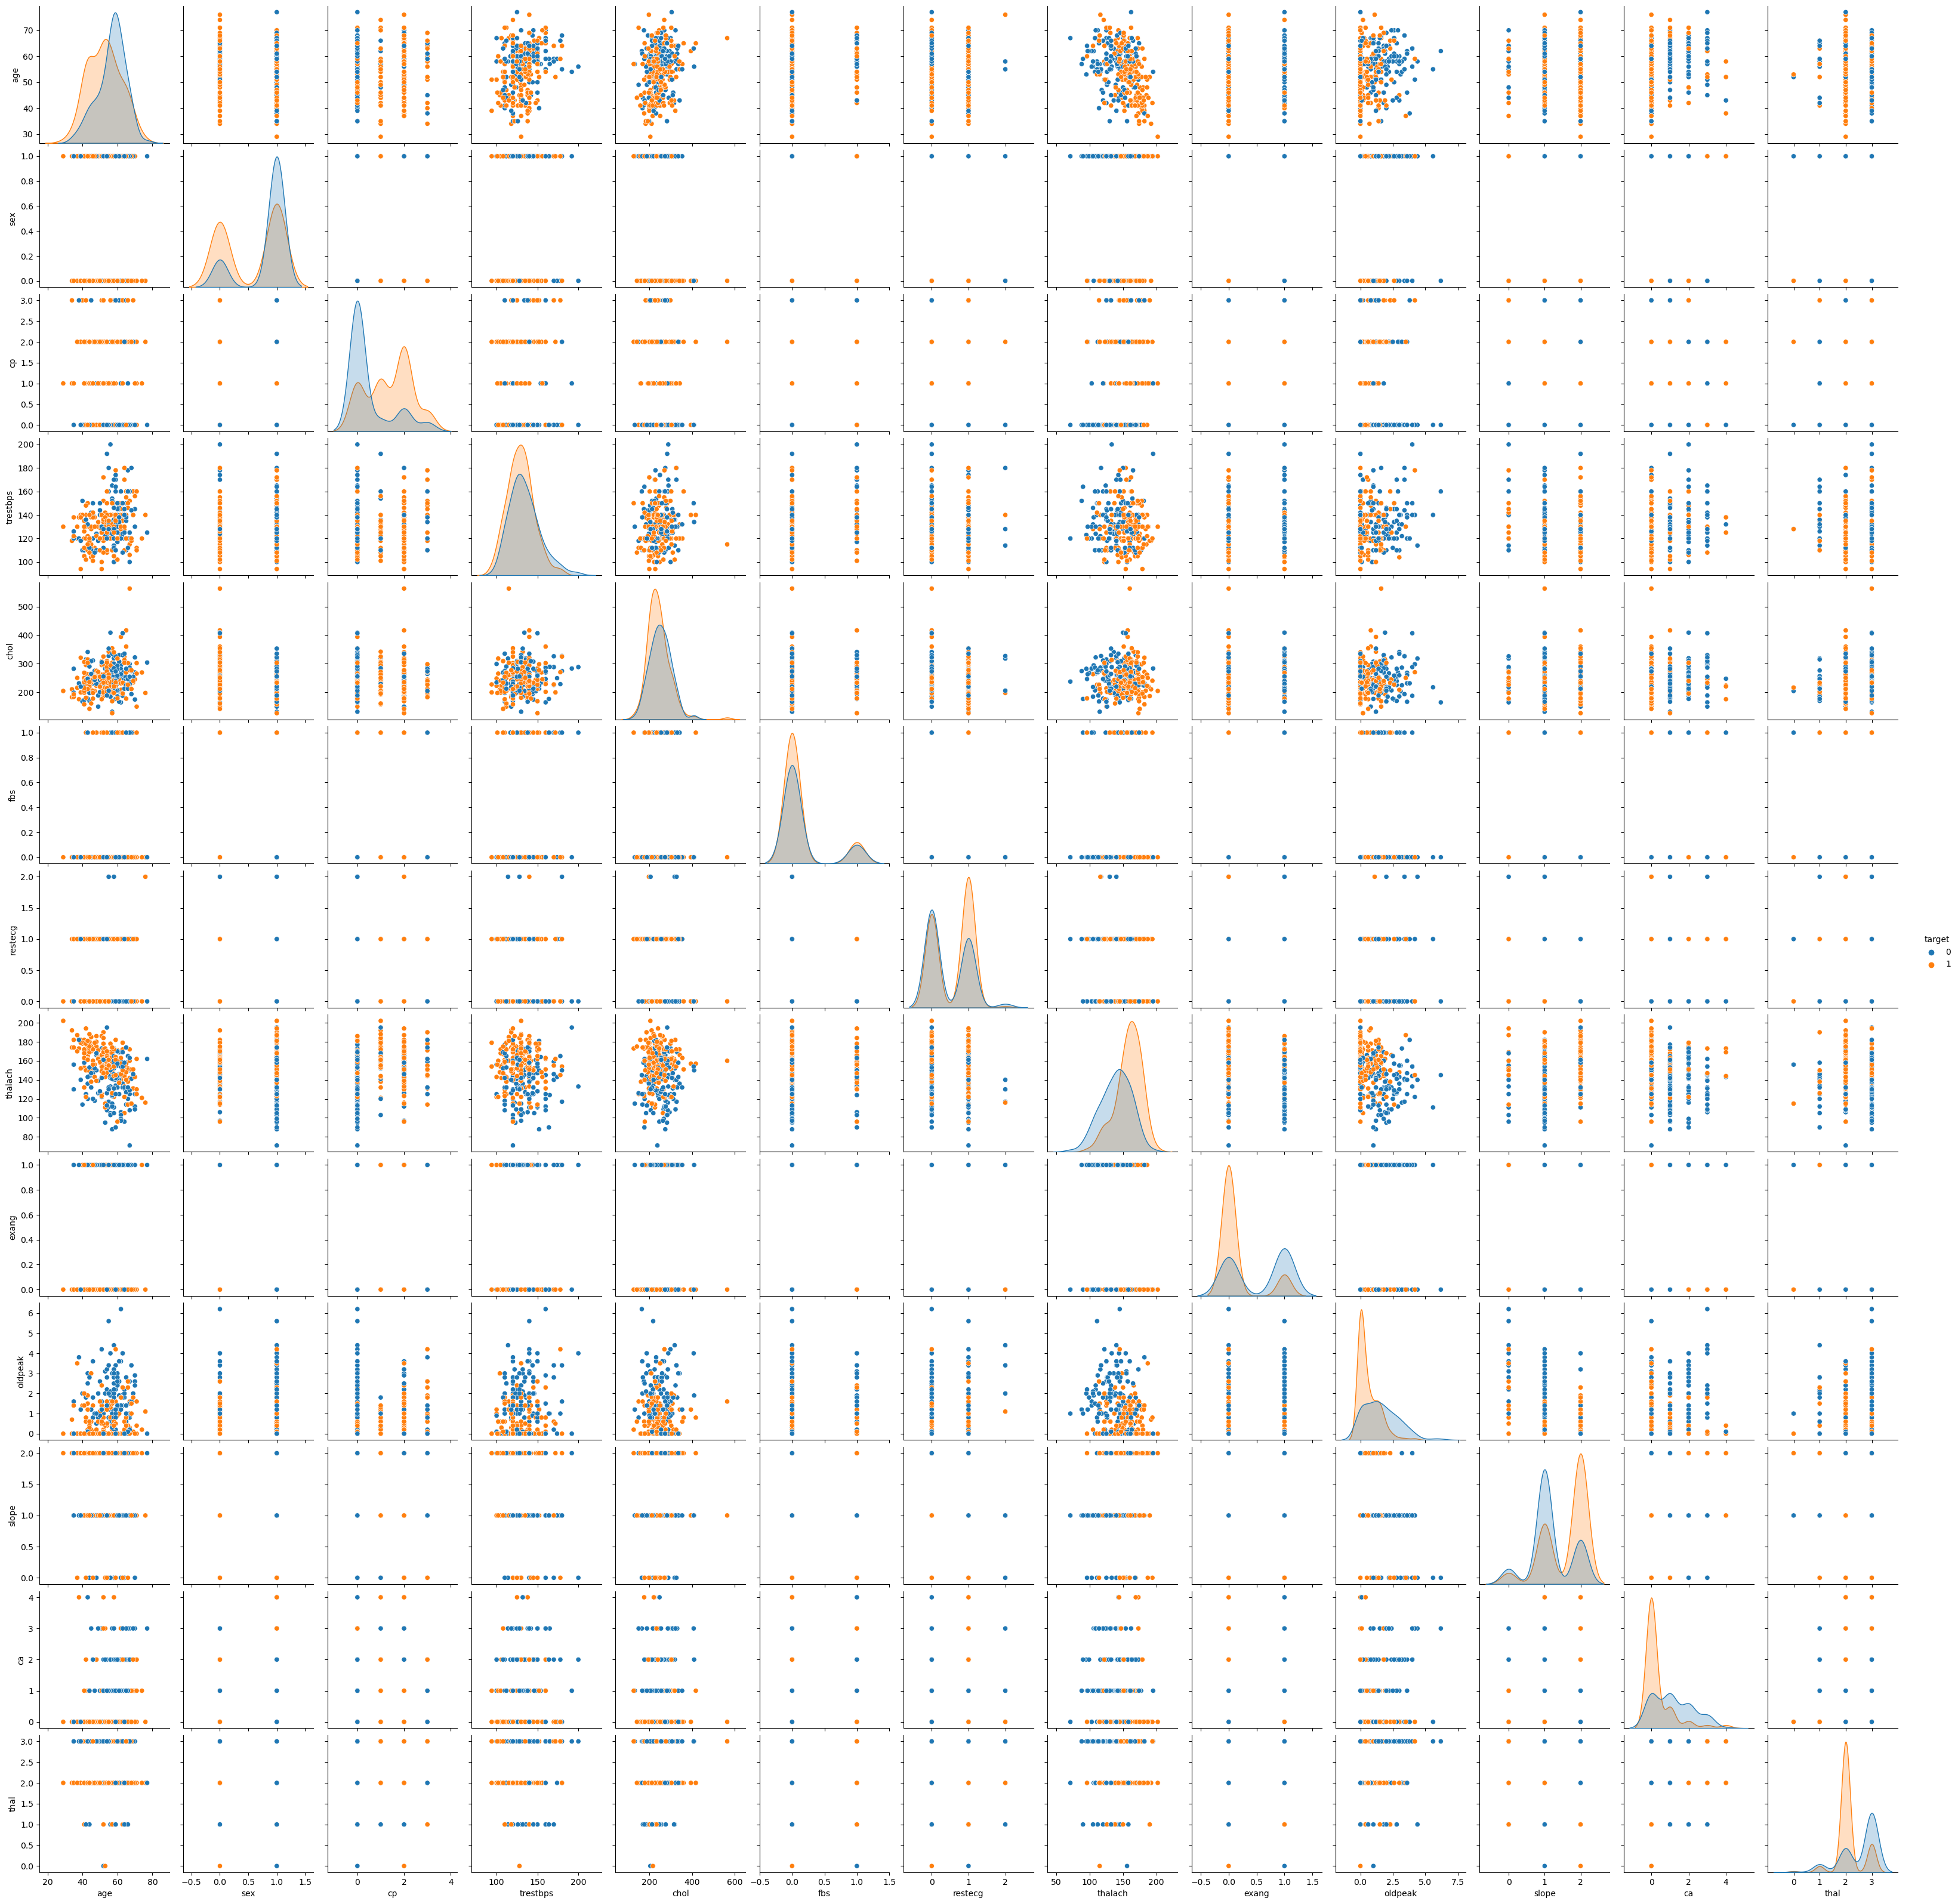

In [102]:
plt.figure(figsize=(250,250))
sns.pairplot(df,hue='target')
plt.show()

# Spliting our data set to input columns and and target column

In [103]:
X=df.iloc[:,:-1]

In [104]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [105]:
y=df.iloc[:,-1]

In [106]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [107]:
X.shape

(302, 13)

In [108]:
y.shape

(302,)

# Scaling our data set

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
scale=StandardScaler()

In [111]:
X=scale.fit_transform(X)

# Spliting into training and testing

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [114]:
x_train

array([[ 0.94979429, -1.46486632,  0.0353515 , ...,  0.97951442,
         1.27497996, -0.51399432],
       [-1.48572607, -1.46486632,  0.0353515 , ...,  0.97951442,
        -0.71491124, -0.51399432],
       [-1.3750206 ,  0.68265615, -0.93520799, ...,  0.97951442,
        -0.71491124, -0.51399432],
       ...,
       [ 0.61767788, -1.46486632,  1.97647049, ...,  0.97951442,
        -0.71491124, -0.51399432],
       [ 1.39261617, -1.46486632,  1.005911  , ...,  0.97951442,
         0.28003436, -0.51399432],
       [-1.3750206 ,  0.68265615,  0.0353515 , ...,  0.97951442,
        -0.71491124, -0.51399432]])

In [115]:
y_test

245    1
349    0
135    0
389    1
66     1
9      0
145    0
337    1
498    1
35     0
5      1
117    0
48     1
237    0
144    1
49     0
152    0
271    1
606    0
566    1
191    1
512    0
528    1
26     1
182    0
594    0
429    0
80     0
356    0
129    1
172    1
Name: target, dtype: int64

# Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
log=LogisticRegression()

In [118]:
log.fit(x_train,y_train)

LogisticRegression()

# Evaluating the model

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
#Training accuracy
x_train_pred=log.predict(x_train)
accuracy_score(y_train,x_train_pred)

0.8708487084870848

In [121]:
#Testing accuracy
x_test_pred=log.predict(x_test)
accuracy_score(y_test,x_test_pred)

0.7741935483870968

# SUPPORT VECTOR CLASSIFIER

In [122]:
from sklearn.svm import SVC

In [123]:
sv=SVC()

In [124]:
sv.fit(x_train,y_train)

SVC()

# Evaluating SVC model

In [125]:
#Training accuracy
x_train_pred1=sv.predict(x_train)
accuracy_score(y_train,x_train_pred1)

0.915129151291513

In [126]:
#Testing accuracy
x_test_pred1=sv.predict(x_test)
accuracy_score(y_test,x_test_pred1)

0.7419354838709677

# KNeighbors classifier

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
nei=KNeighborsClassifier()

In [129]:
nei.fit(x_train,y_train)

KNeighborsClassifier()

# Evaluating KNN model

In [130]:
#Training accuracy
x_train_pred2=nei.predict(x_train)
accuracy_score(y_train,x_train_pred2)

0.8856088560885609

In [131]:
#Testing accuracy
x_test_pred2=sv.predict(x_test)
accuracy_score(y_test,x_test_pred2)

0.7419354838709677

# Training with Non-linear Model

In [132]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [133]:
xn=df.iloc[:,:-1]

In [134]:
yn=df.iloc[:,-1]

In [135]:
xn.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [136]:
yn.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

# spliting into training and testing

In [137]:
X_train,X_test,Y_train,Y_test=train_test_split(xn,yn,test_size=0.15,random_state=45)

# Decision tree Classifier

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
dtree=DecisionTreeClassifier()

In [140]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

# Evaluating decision tree model

In [141]:
#Training accuracy
x_train_pred3=dtree.predict(X_train)
accuracy_score(Y_train,x_train_pred3)

1.0

In [142]:
#Testing accuracy
x_test_pred3=sv.predict(X_test)
accuracy_score(Y_test,x_test_pred3)

0.5434782608695652

# Random Forest Classifier

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rand=RandomForestClassifier(max_depth=5,n_estimators=35)

In [145]:
rand.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, n_estimators=35)

In [146]:
#Training accuracy
x_train_pred4=rand.predict(X_train)
accuracy_score(Y_train,x_train_pred4)

0.9375

In [147]:
#Testing accuracy
x_test_pred4=rand.predict(X_test)
accuracy_score(Y_test,x_test_pred4)

0.8478260869565217

# Visulaizing our model performance

In [150]:
final_data=pd.DataFrame({"Models":['LR','SVM','KNN','DT','RC'],"Acc":[accuracy_score(y_test,x_test_pred),accuracy_score(y_test,x_test_pred1),accuracy_score(y_test,x_test_pred2),accuracy_score(Y_test,x_test_pred3),accuracy_score(Y_test,x_test_pred4)]})

In [151]:
final_data

,Models,Acc
0,LR,0.774194
1,SVM,0.741935
2,KNN,0.741935
3,DT,0.543478
4,RC,0.847826


<AxesSubplot:xlabel='Models', ylabel='Acc'>

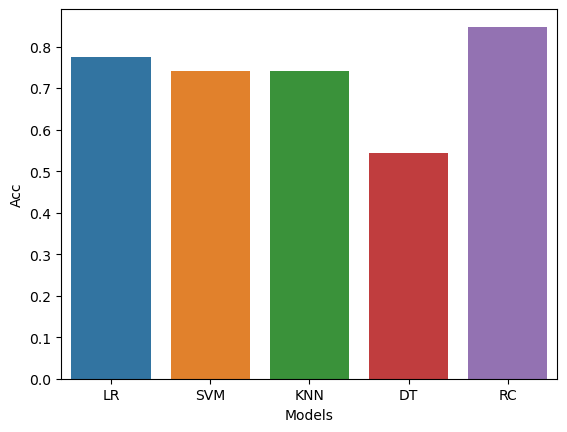

In [152]:
sns.barplot(data=final_data,x='Models',y='Acc')

# Train our model with entier data set

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
random=RandomForestClassifier(max_depth=5,n_estimators=35)

In [154]:
random.fit(xn,yn)

RandomForestClassifier(max_depth=5, n_estimators=35)

# Predicitng with new data

In [155]:
new_data=pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'treatbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3
},index=[0])

In [156]:
new_data

,age,sex,cp,treatbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [157]:
p=random.predict(new_data)

In [158]:
print(p)

[0]


# Saving model with pickle

In [159]:
import pickle as pk

In [160]:
file=open('Heart_pre.pkl','wb')

In [161]:
pk.dump(random,file)

In [162]:
model=pk.load(open('Heart_pre.pkl','rb'))

In [163]:
l=model.predict(new_data)

In [164]:
print(l)

[0]
